In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

___

# Music Recommendation Training Dataset Overview

___

In [2]:
#Store music recommendation training dataset file path in variable for readability
train_path = ("/Users/sa14/Desktop/Music Recommendation Algorithm with Unsupervised Learning/data/music_rec_trainset.csv")

#Load music recommendation training dataset csv as a dataframe
df = pd.read_csv(train_path)

In [3]:
#Get the first 10 rows of the music recommendation training dataframe
df.head(10)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0
5,14,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,...,0.001053,0.001053,0.001053,0.001053,0.172173,0.001053,0.128292,0.001053,violence,1.0
6,15,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,...,0.384703,0.000483,0.000483,0.000483,0.044355,0.000483,0.000483,0.123150,world/life,1.0
7,17,johnny mathis,it's not for me to say,1950,pop,care moment hold fast press lips dream heaven ...,21,0.002506,0.002506,0.336056,...,0.002506,0.002506,0.002506,0.002506,0.386887,0.002506,0.062602,0.002506,world/life,1.0
8,20,stélios kazantzídis,klapse me mana klapse me,1950,pop,lonely night surround power read mind hour nig...,30,0.083537,0.002024,0.002024,...,0.167783,0.002024,0.002024,0.002024,0.002024,0.002024,0.002024,0.031600,romantic,1.0
9,23,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,...,0.091572,0.001120,0.001120,0.105752,0.001120,0.001120,0.630507,0.001120,sadness,1.0


In [4]:
#Remove "Unnamed:0" column from dataframe
df.drop(df.filter(regex="Unnamed").columns, axis=1, inplace=True)

#Verify "Unnamed:0" column removal
df.head()

,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,topic,age
0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,sadness,1.0
1,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,world/life,1.0
2,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,music,1.0
3,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,romantic,1.0
4,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,romantic,1.0


In [5]:
#Get the count of rows and columns for the dataset
df.shape

(28362, 23)

**This dataset has 28,362 rows and 23 columns after removing the "Unnamed: 0" column**

In [14]:
#Get overall count of null/NaN values in the dataset
null_count = df.isnull().sum()
print("Null Values by Column\n\n", null_count)

Null Values by Column

 artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
sadness                     0
feelings                    0
topic                       0
age                         0
dtype: int64


**No null values exist across this entire dataset.**

In [7]:
#Get column data types (dtype), overall count of each present dtype, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28362 entries, 0 to 28361
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   artist_name               28362 non-null  object 
 1   track_name                28362 non-null  object 
 2   release_date              28362 non-null  int64  
 3   genre                     28362 non-null  object 
 4   lyrics                    28362 non-null  object 
 5   len                       28362 non-null  int64  
 6   dating                    28362 non-null  float64
 7   violence                  28362 non-null  float64
 8   world/life                28362 non-null  float64
 9   night/time                28362 non-null  float64
 10  shake the audience        28362 non-null  float64
 11  family/gospel             28362 non-null  float64
 12  romantic                  28362 non-null  float64
 13  communication             28362 non-null  float64
 14  obscen

In [8]:
#Determine the descriptive statistics of the dataset such as the mean, median, percentiles, etc.
df.describe()

,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
count,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000,28362.000000
mean,1990.239652,73.030534,0.021110,0.118371,0.120984,0.057356,0.017418,0.017045,0.048676,0.076651,0.097185,0.060067,0.047417,0.049008,0.024155,0.129402,0.030995,0.425148
std,18.486997,41.831605,0.052366,0.178658,0.172216,0.111892,0.040658,0.041968,0.106071,0.109497,0.181314,0.123346,0.091559,0.089553,0.051032,0.181149,0.071656,0.264100
min,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000284,0.000289,0.014286
25%,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,0.001144,0.001053,0.000975,0.000993,0.000993,0.000957,0.001144,0.000993,0.185714
50%,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,0.002632,0.001815,0.001815,0.001645,0.001815,0.001645,0.005263,0.001754,0.414286
75%,2007.000000,93.000000,0.004049,0.192538,0.197854,0.065778,0.009989,0.004785,0.042304,0.132111,0.088799,0.055109,0.054373,0.064302,0.025515,0.235115,0.032617,0.642857
max,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,0.645829,0.992298,0.956938,0.638021,0.667782,0.618073,0.981424,0.958810,1.000000


In [12]:
#Check for duplicate entries, get count of duplicates, then store in variable
duplicate_counts = df.value_counts()
duplicate_count = duplicate_counts[duplicate_counts > 1].sum()
print("The total amount of duplicate values in the entire set is", duplicate_count)

The total amount of duplicate values in the entire set is 0


___

## Univariate Analysis
___

> ### Pre-Exisiting Info About the *"release_date"* Feature
>
> The year the song was released expressed as a 4 digit integer.
___

In [10]:
#Inspect "release date" column by getting count of unique values (years)
df["release_date"].value_counts(ascending=False)

#It seems as though the amount of releases may generally increase every year from 1950 to 2019

release_date
2017    660
2018    653
2015    617
2009    596
2012    588
       ... 
1955    106
1952     59
1951     58
1950     51
1953     48
Name: count, Length: 70, dtype: int64

**The dataset spans almost 70 years, 1950 - 2019**

In [11]:
#Group the release dates and song counts by decade using floor division for understandability
release_count_dec = df["release_date"]//10*10

#Get count of songs grouped by decade
release_count_dec.value_counts()

release_date
2010    5631
2000    4779
1980    4674
1990    4454
1970    3950
1960    3407
1950    1467
Name: count, dtype: int64

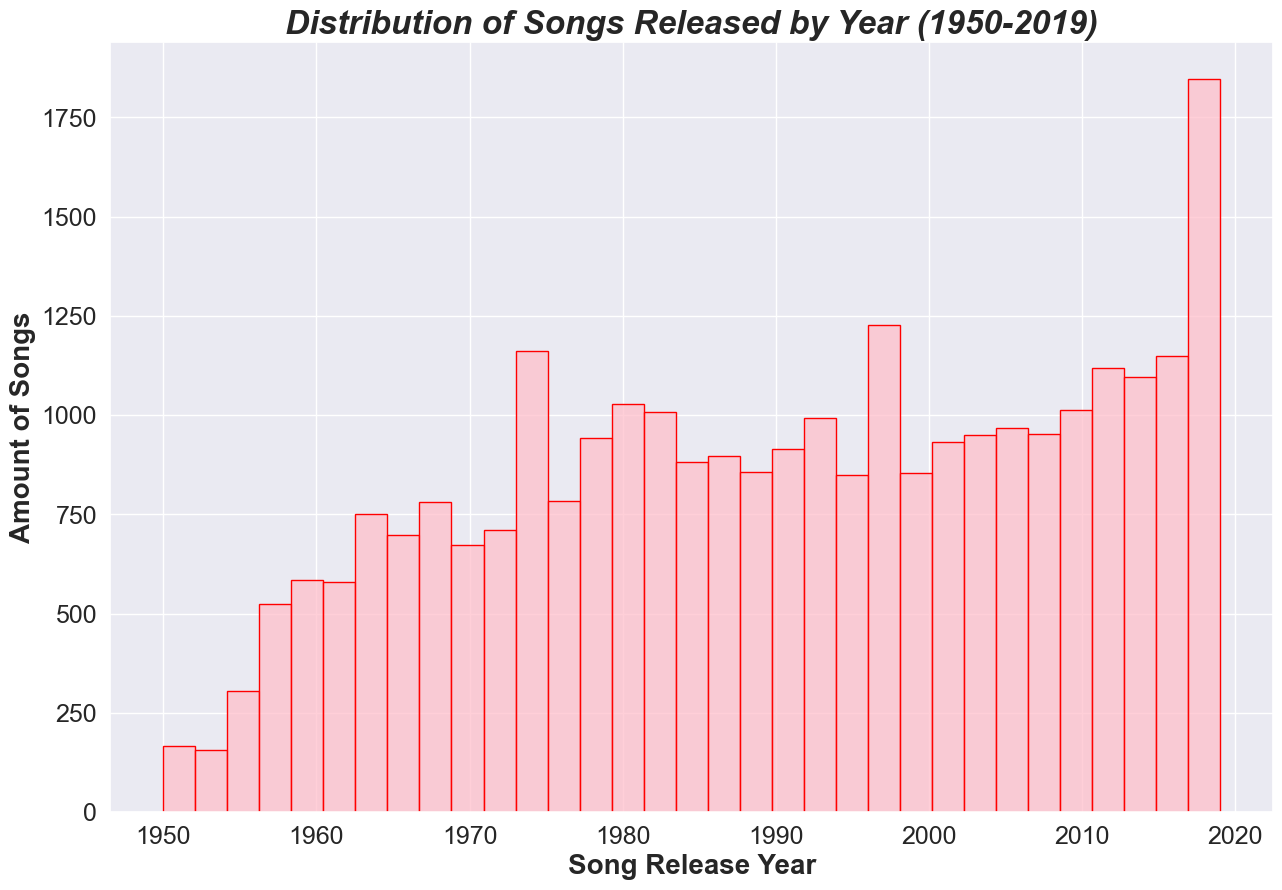

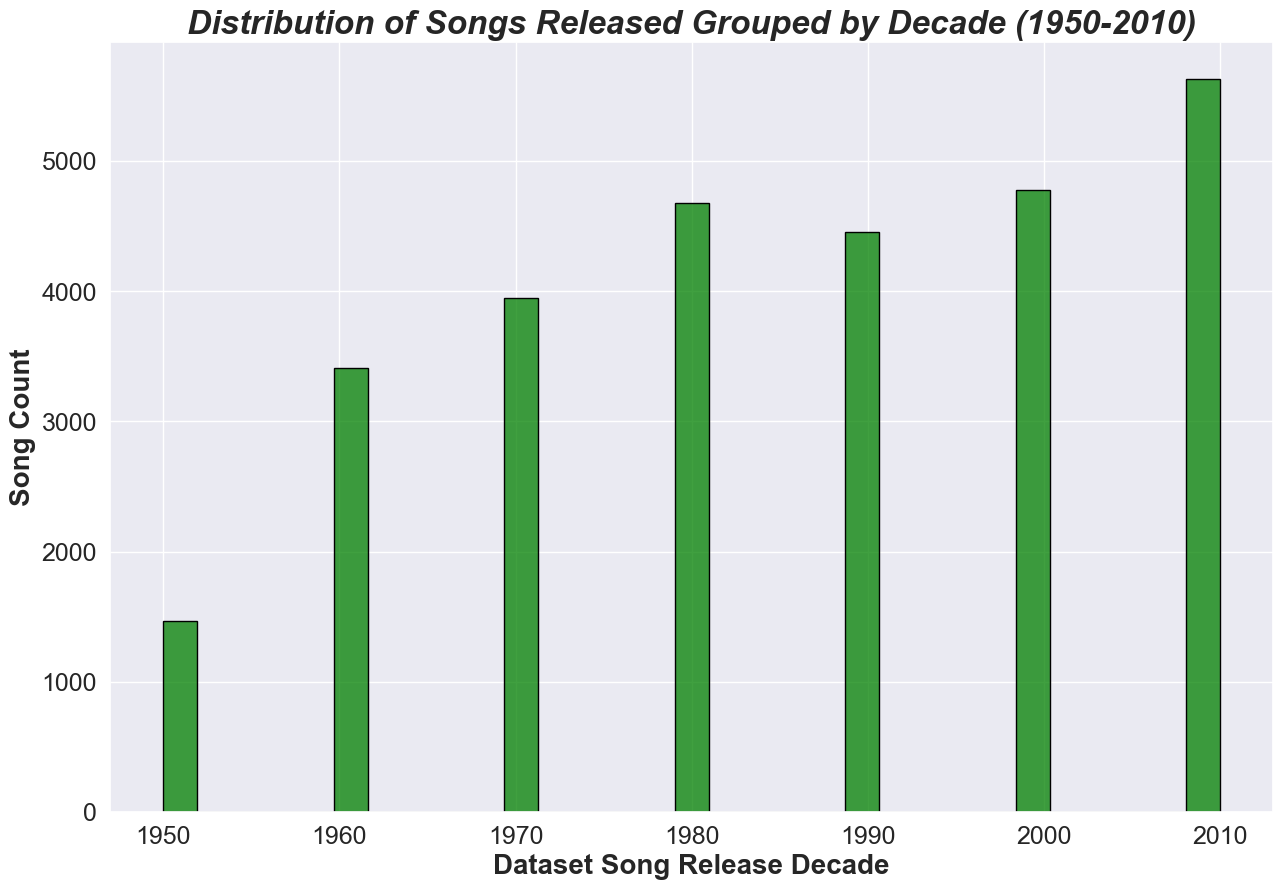

In [31]:
#Visualize the distribution of songs from 1950-2020 (in increments of 10/decades)

plt.figure(figsize=(15, 10))

sns.histplot(data = df, x = "release_date", color="pink", edgecolor ='red', linewidth= 1).set(title='width = 1')
sns.set(style="darkgrid")
plt.title("Distribution of Songs Released by Year (1950-2019)", fontsize=24, weight='bold', style='italic')
plt.xlabel("Song Release Year", fontsize=20, weight='bold')
plt.ylabel("Amount of Songs", fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()


#Visualization the count of songs, grouped by decade specifically

plt.figure(figsize=(15, 10))

sns.set(style="darkgrid")
sns.histplot(data = release_count_dec, color="green", edgecolor ='black').set(title='width = 1')

plt.title("Distribution of Songs Released Grouped by Decade (1950-2010)", fontsize=24, weight='bold', style='italic')
plt.xlabel("Dataset Song Release Decade", fontsize=20, weight='bold')
plt.ylabel("Song Count", fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()



> ### *Insights* from the Univariate Analysis of the "release_date" Feature
>
> 
> * The 2010s are the decade with the highest amount of songs released in the dataset with 5631 total compared to the starting decade of the 1950s in which 1,467 songs were released. 
>   * **The *specific* year with the highest amount of songs released is 2017 with 660 total songs.**
>   * As was uncovered in the examination of the column's unique value counts:
>
| Younger Release Year | Amount of Songs| 
| -------- | ------- |
| 2009     | 596     |
| 2012     | 588     |
| 2015     | 617     |
| 2017     | 660     |
> 
> * There is a significant increase between the starting year of 1950 and the latter years of the dataset approaching 2020.
> * **The *specific* year with the lowest amount of songs released is 1950 with 51 total songs.**
>
| Older Release Year | Amount of Songs|
| -------- | ------- |
| 1950     |  51     |
| 1951     |  58     |
| 1952     |  59     |
| 1953     |  48     |
| 1955     | 106     |

___


> ### Pre-Exisiting Info About the *"age"* Column
>
>  A score from 0 to 1 expressing how “old” a song is from our perspective expressed as a single integer or float. 
>   * 1 = the oldest
>   * 0 = the youngest 
___

In [15]:
#Get overall count of songs considered old or new, where 1 = the oldest  and 0 = the newest
df["age"].value_counts(ascending=False)

age
0.042857    660
0.028571    653
0.071429    617
0.157143    596
0.114286    588
           ... 
0.928571    106
0.971429     59
0.985714     58
1.000000     51
0.957143     48
Name: count, Length: 70, dtype: int64

**70 unique age integer values contained in the dataset ranging from 0 to 1.** 

In [15]:
#Specifically find count of the youngest songs where age = 0

youngest_songs = df [df["age"]==0]

youngest_songs = youngest_songs.value_counts().sum()

print ("The total count of the absolute youngest songs in the dataset is", youngest_songs, "\n" 
"There aren't any songs in the dataset with an age of true 0.\n")


#Specifically find count of the oldest songs where age = 1

oldest_songs = df[df["age"]== 1]

oldest_songs = oldest_songs.value_counts().sum()

print ("The total count of the absolute oldest songs in the dataset is:", oldest_songs, "\n",
       "This means that songs from 1950 account for just 0.00179% of all songs.\n")


#Get count of songs younger than 0.5

below_05 = df[df["age"] < 0.5]
below_05 = below_05.value_counts().sum()

print ("There are", below_05, "songs under the age of 0.5 in this dataset.", "\n")

#Get count of songs younger than 0.5

over_05 = df[df["age"] > 0.5]
over_05  = over_05 .value_counts().sum()

print ("There are", over_05, "songs over the age of 0.5 in this dataset.", "\n")

#Get count of songs aged 0.5
songs_05 = df[df["age"] == 0.5]
songs_05 = songs_05.value_counts().sum()

print ("There are", songs_05, "songs with an exact age of 0.5 in this dataset.")

The total count of the absolute youngest songs in the dataset is 0 
There aren't any songs in the dataset with an age of true 0.

The total count of the absolute oldest songs in the dataset is: 51 
 This means that songs from 1950 account for just 0.00179% of all songs.

There are 16620 songs under the age of 0.5 in this dataset. 

There are 11335 songs over the age of 0.5 in this dataset. 

There are 407 songs with an exact age of 0.5 in this dataset.


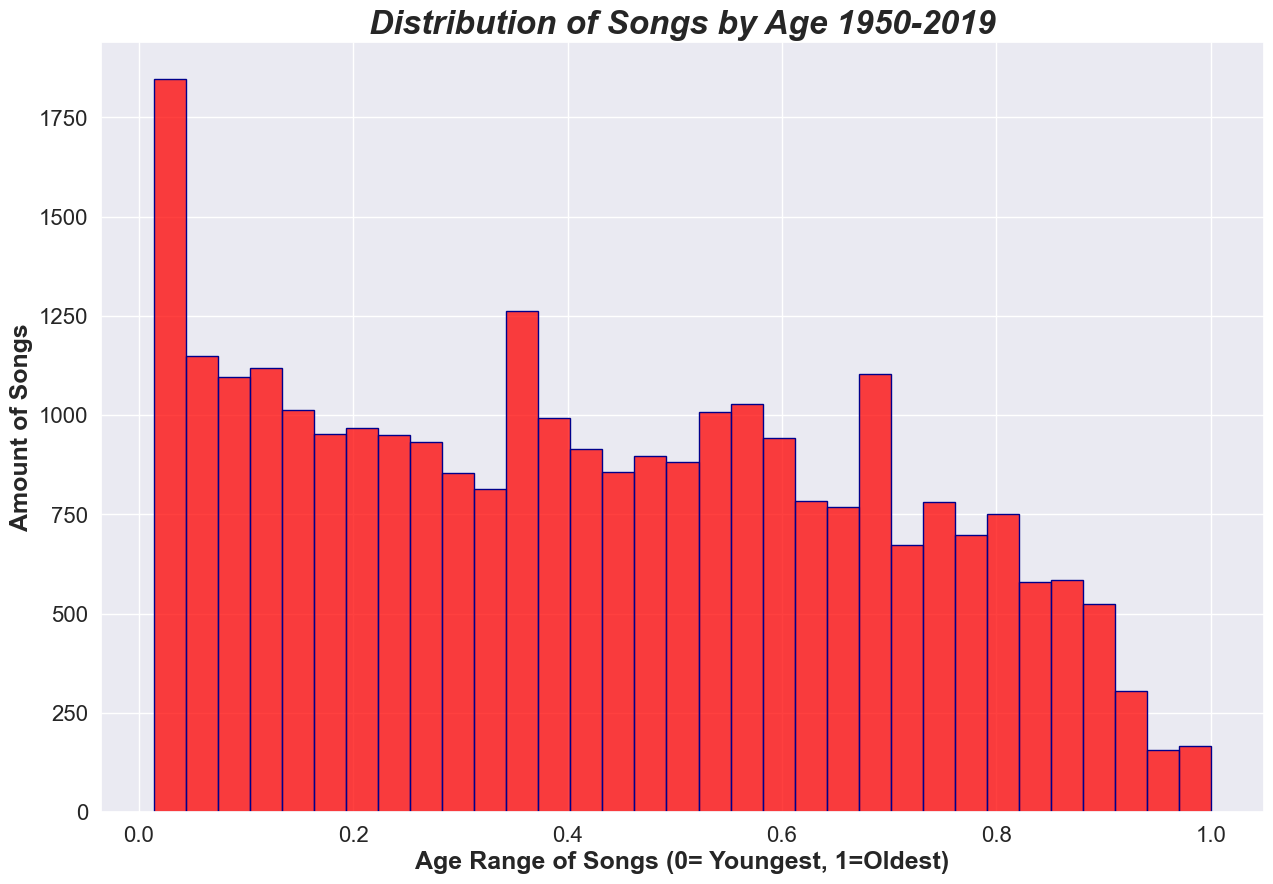

In [15]:
# Visualize distrubtion of songs by age

plt.figure(figsize=(15, 10))

sns.histplot(data = df, x = "age", color="red", edgecolor ='darkblue', linewidth= 1).set(title='width = 1')
plt.title("Distribution of Songs by Age 1950-2019", fontsize=24, weight='bold', style='italic')
plt.xlabel("Age Range of Songs (0= Youngest, 1=Oldest)", fontsize=18, weight='bold')
plt.ylabel("Amount of Songs", fontsize=18, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

___

> ### *Insights* from the Univariate Analysis of the "age" Feature
>
> * There are 11335 songs **over** the age of 0.5 in this dataset (out of 28,362).
>
> * There are 407 songs aged 0.5 in this dataset.
>
> * There are 16620 songs **under** the age of 0.5 in this dataset.
>   * **This means that the majority of music in the dataset is relatively recent (closer to age 0 = closer to 2019 than 1950 - the year at the start of the set.)**
>  
>
| Age | Amount of Songs| 
| -------- | ------- |
| 0.042857 | 660     |
| 0.028571 | 653     |
| 0.071429 | 617     |
| 0.157143 | 596     |
| 0.114286 | 588     |

>
> * There aren't any songs in the dataset with an age of true 0 (no other digits after the decimal point 0.0) meaning none of the dataset songs were newly released at the time of the dataset's publishing. (newly released = 2019)
>
> * **51 songs have an age of 1 and represent the oldest subset of songs.** 

| Age | Amount of Songs| 
| -------- | ------- |
| 0.928571 |  106    |
| 0.971429 |   59    |
| 0.985714 |   58    |
| 1.000000 |   51    |
| 0.957143 |   48    |


___
> ### Pre-Exisiting Info About the *"genre"* Feature
>
>  The categorical genre of a song expressed as a string.
>
___

In [21]:
#Get count of the unique genres present in the dataset
df["genre"].value_counts()

genre
pop        7038
country    5444
blues      4603
rock       4032
jazz       3844
reggae     2497
hip hop     904
Name: count, dtype: int64

**There are 7 unique musical genres present in the dataset.**

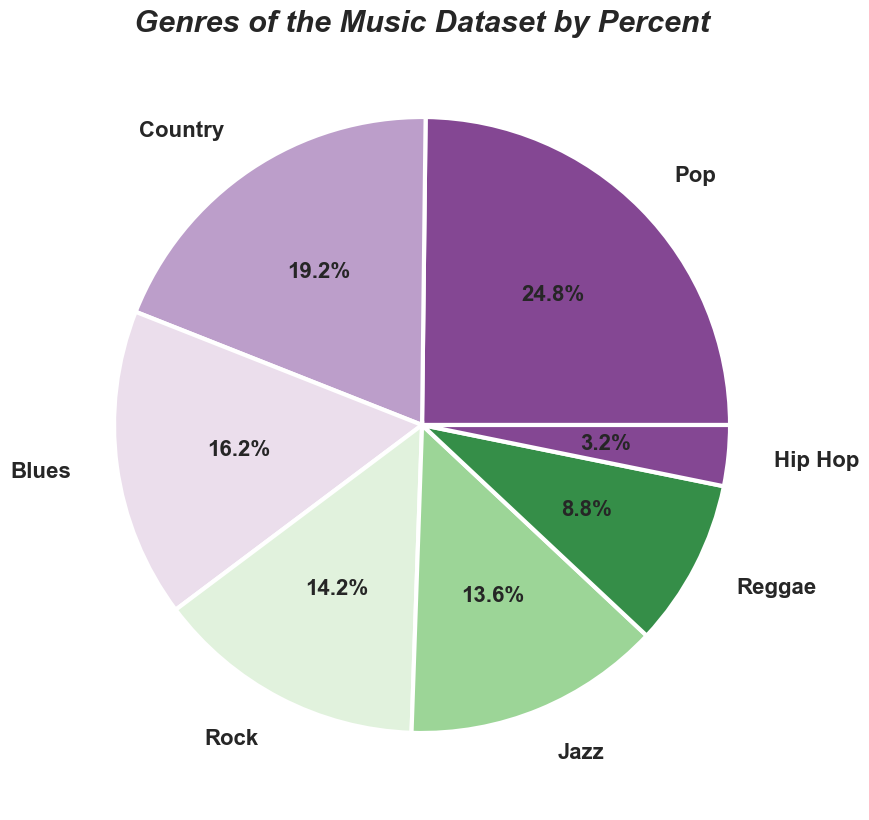

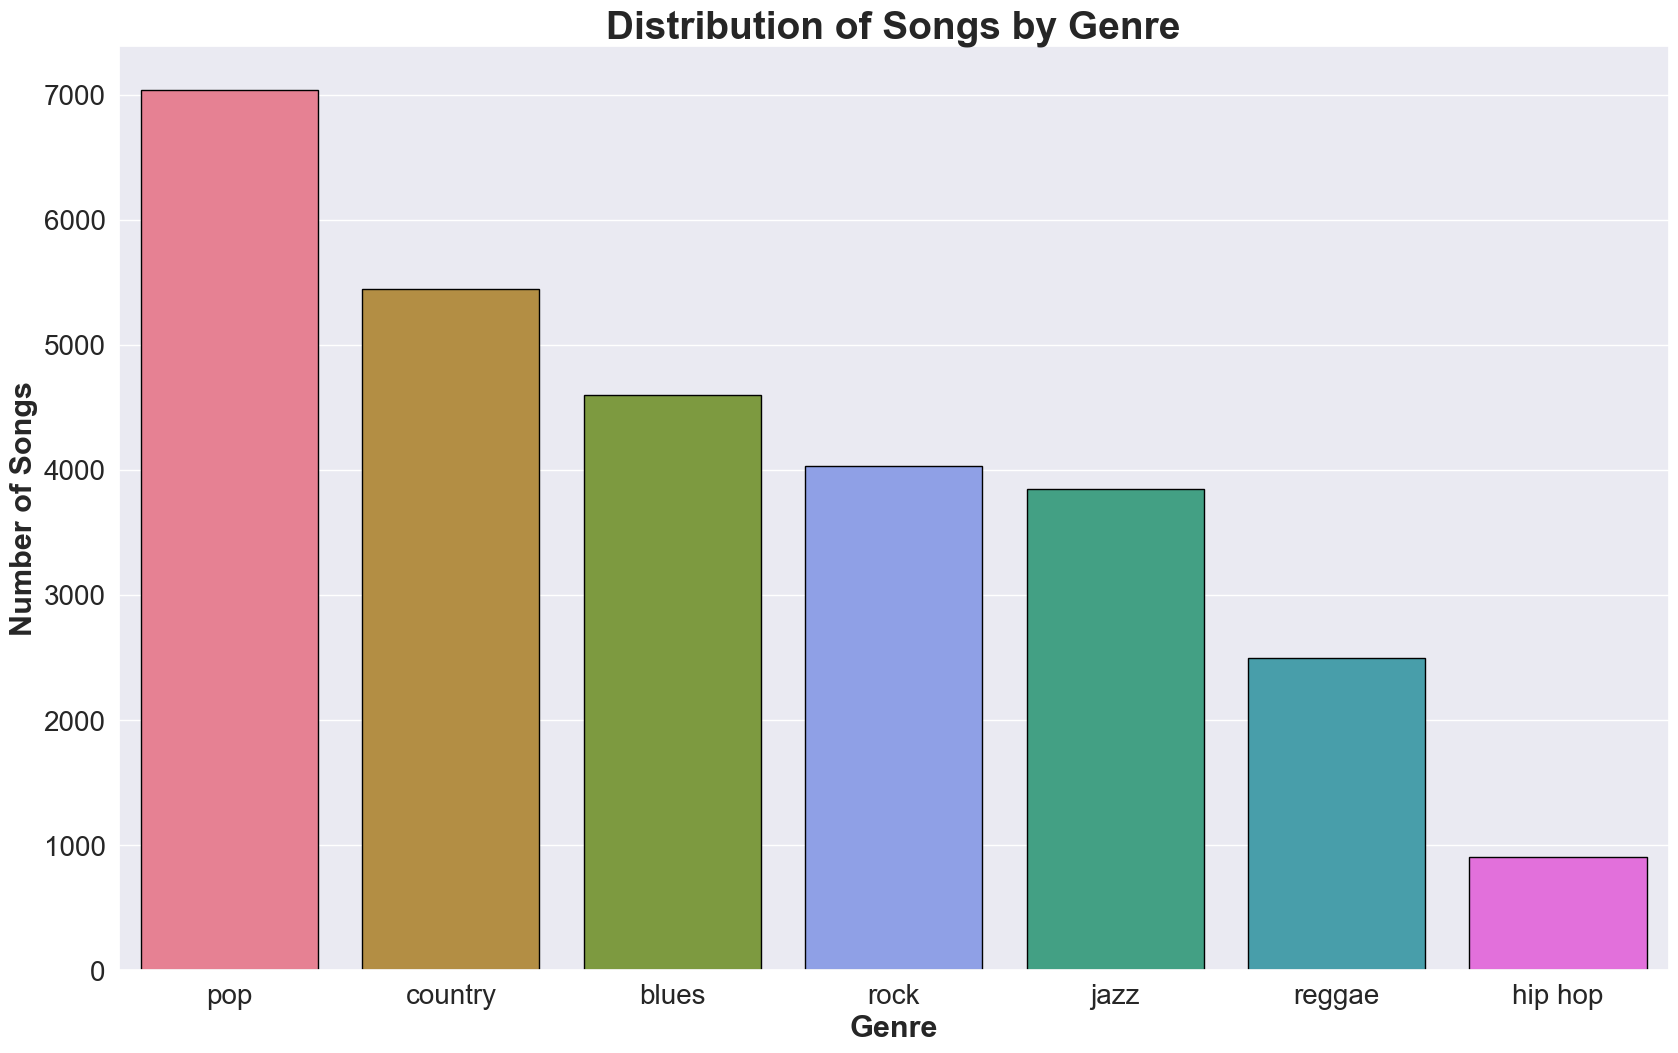

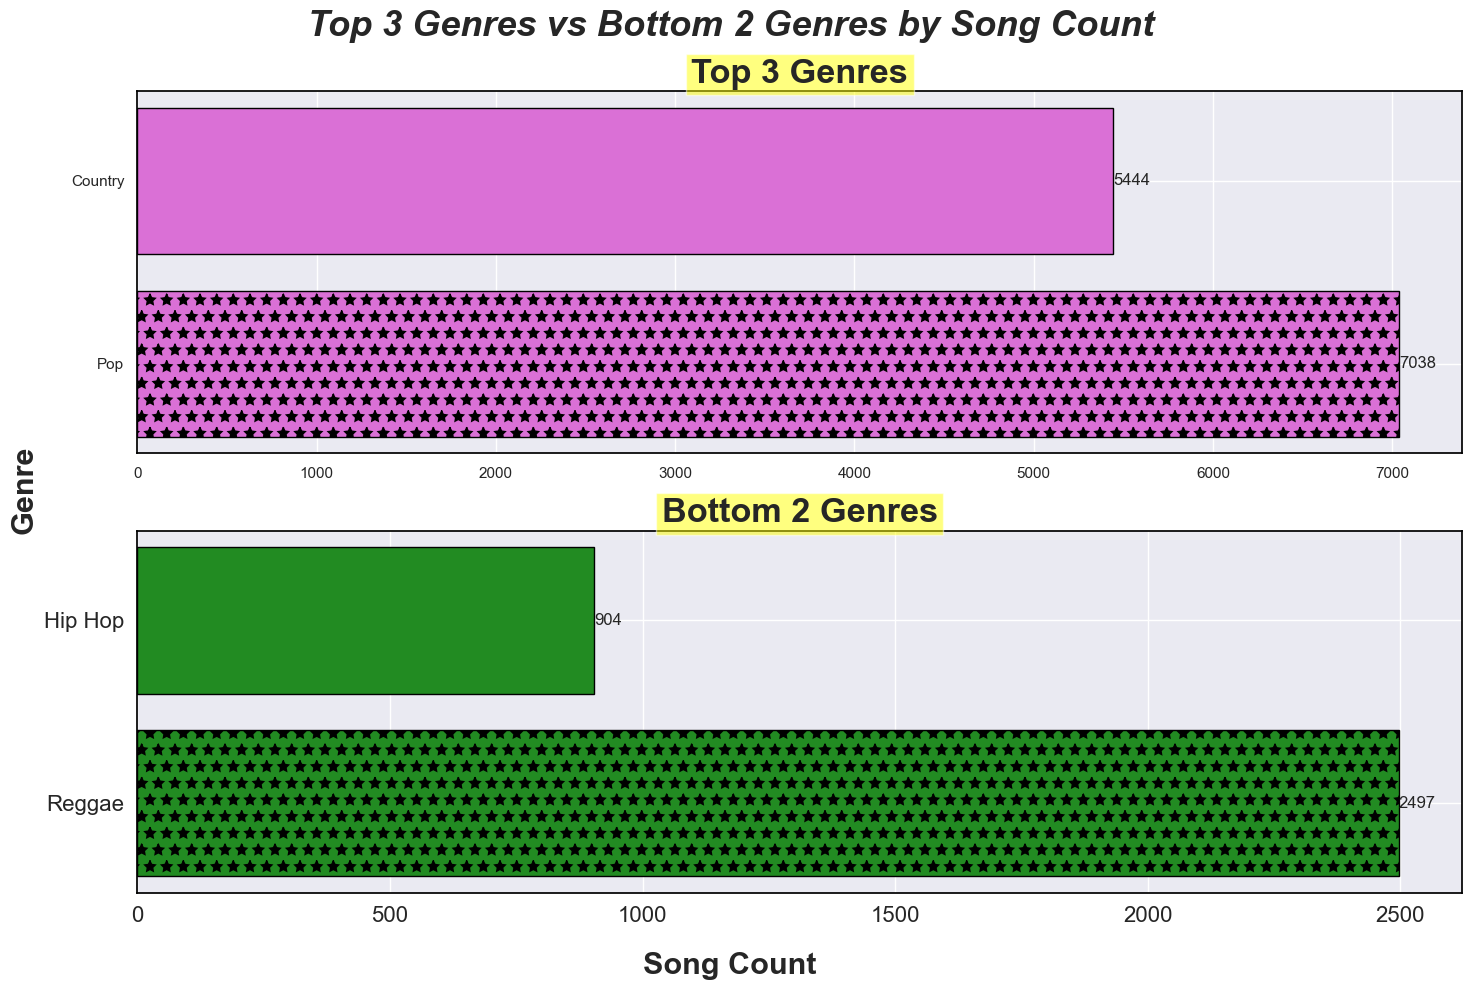

In [35]:
# Create a pieplot to visualize amount of genres by proportion


gnames = ["Pop", "Country", "Blues", "Rock", "Jazz", "Reggae", "Hip Hop"]
gcounts = [7038, 5444, 4603, 4032, 3844, 2497, 904]

plt.figure(figsize=(10, 10))
plt.pie(gcounts, labels=gnames, labeldistance=1.15, autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, textprops={'fontsize': 16, 'weight' : 'bold'})
plt.title("Genres of the Music Dataset by Percent", fontsize=22, weight='bold', style='italic')
plt.show()

# Create a barplot to visualize amount of genres in dataset 

g_order = df["genre"].value_counts(ascending=False).index

plt.figure(figsize=(20, 12))

sns.countplot(data=df, x= "genre", order=g_order, hue="genre", edgecolor= "black")

sns.set(style="darkgrid", palette="PRGn")
plt.xlabel("Genre", fontsize=22, weight='bold')
plt.ylabel('Number of Songs', fontsize=22, weight='bold')
plt.title("Distribution of Songs by Genre", fontsize=28, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()


#Visualize comparison of the top 2 genres and the bottom 2 genres by song as 2 subplots 

# Contain genre names in 2 different categories
top2_genres = ['Pop', 'Country']
btm2_genres = ["Reggae", "Hip Hop"]

# Contain genre counts in 2 different categories
top_values = [7038, 5444]
btm_values = [2497, 904]

# Create 2 subplots
fig, axes = plt.subplots(2, figsize=(15, 10))


# Define Plot 1 - Top 2 Genres
bars1 = axes[0].barh(top2_genres, top_values, color="orchid", edgecolor= "black")
bars1[0].set_hatch('*')
axes[0].set_title('Top 3 Genres', fontsize=24.7, weight='bold', bbox=dict(facecolor='yellow', alpha=0.5))
axes[0].bar_label(bars1, fmt='%.0f', label_type='edge')
plt.subplots_adjust(wspace=2, hspace=2)

#Define Plot 1 Spine color
axes[0].spines['bottom'].set_color('black')
axes[0].spines['top'].set_color('black')
axes[0].spines['right'].set_color('black')
axes[0].spines['left'].set_color('black')


#Increase tick parameter size for both axes in plot 1
plt.tick_params(axis='both', which='major', labelsize=26)

# Define Plot 2 - Bottom 2 Genres
bars2 = axes[1].barh(btm2_genres, btm_values, color="forestgreen", edgecolor= "black")
bars2[0].set_hatch('*')
axes[1].set_title('Bottom 2 Genres', fontsize=24.7, weight='bold', bbox=dict(facecolor='yellow', alpha=0.5))
axes[1].bar_label(bars2, fmt='%.0f', label_type='edge')


#Define Plot 2 Spine color
axes[1].spines['bottom'].set_color('black')
axes[1].spines['top'].set_color('black')
axes[1].spines['right'].set_color('black')
axes[1].spines['left'].set_color('black')

#Increase tick parameter size for both axes in plot 2
plt.tick_params(axis='both', which='major', labelsize=16)

# Add a title to the whole figure
fig.suptitle('Top 3 Genres vs Bottom 2 Genres by Song Count', fontsize=26, weight='bold', style='italic')

# Add uptitle for the X and Y axes labels
fig.supxlabel("Song Count", fontsize=22, weight='bold')
fig.supylabel("Genre", fontsize=22, weight='bold')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()


plt.show()


___

> ### *Insights* from the Univariate Analysis of the "genre" Feature
>
> * The dataset contains 7 unique genres: Pop, Country, Blues, Rock, Jazz, Reggae, and Hip Hop
> * Pop and Country are the top 2 genres avaiable.
>   * There are 7,380 Pop songs and 5,444 Country songs, making up 44% of all available music
> * Reggae and Hip Hop are the bottom 2 genres
>   * There are 2497 Reggae songs
>   * **Hip Hop is the least common genre in the dataset with only 904 songs, just 3.2% of all available music**
>  

___
> ### Pre-Exisiting Info About the *"artist_name"* Feature
>
>  The name of the artist expressed as a string.
>
___

In [252]:
#Get count of the unique artists present in the dataset
df["artist_name"].value_counts()

artist_name
johnny cash        190
ella fitzgerald    188
dean martin        146
willie nelson      131
george jones       107
                  ... 
stigmato inc         1
plej                 1
slow train soul      1
oi va voi            1
$uicideboy$          1
Name: count, Length: 5424, dtype: int64

**There are 5424 unique artists.**

/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_81608/259950545.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_artists.index, y=top10_artists.values, palette="magma",


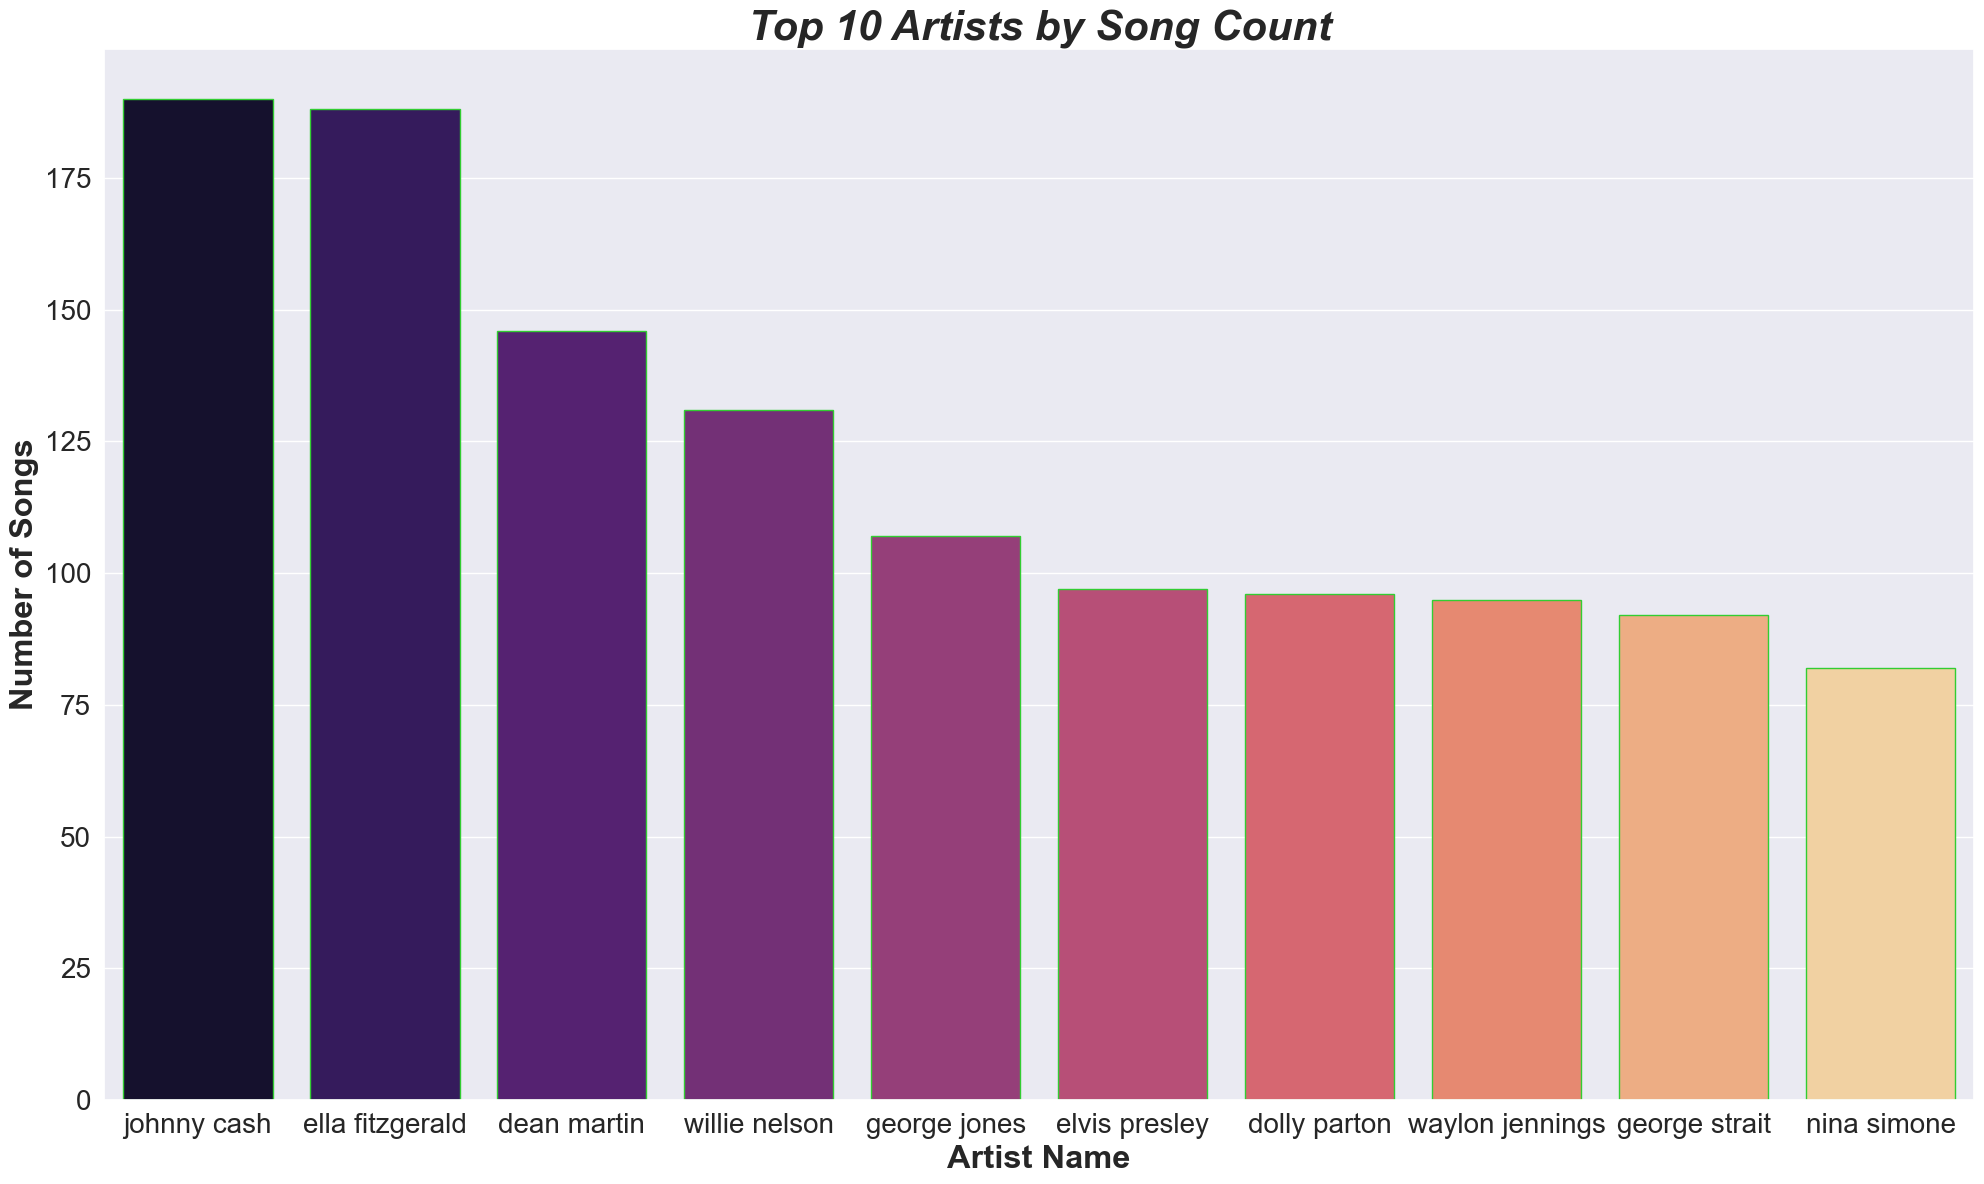

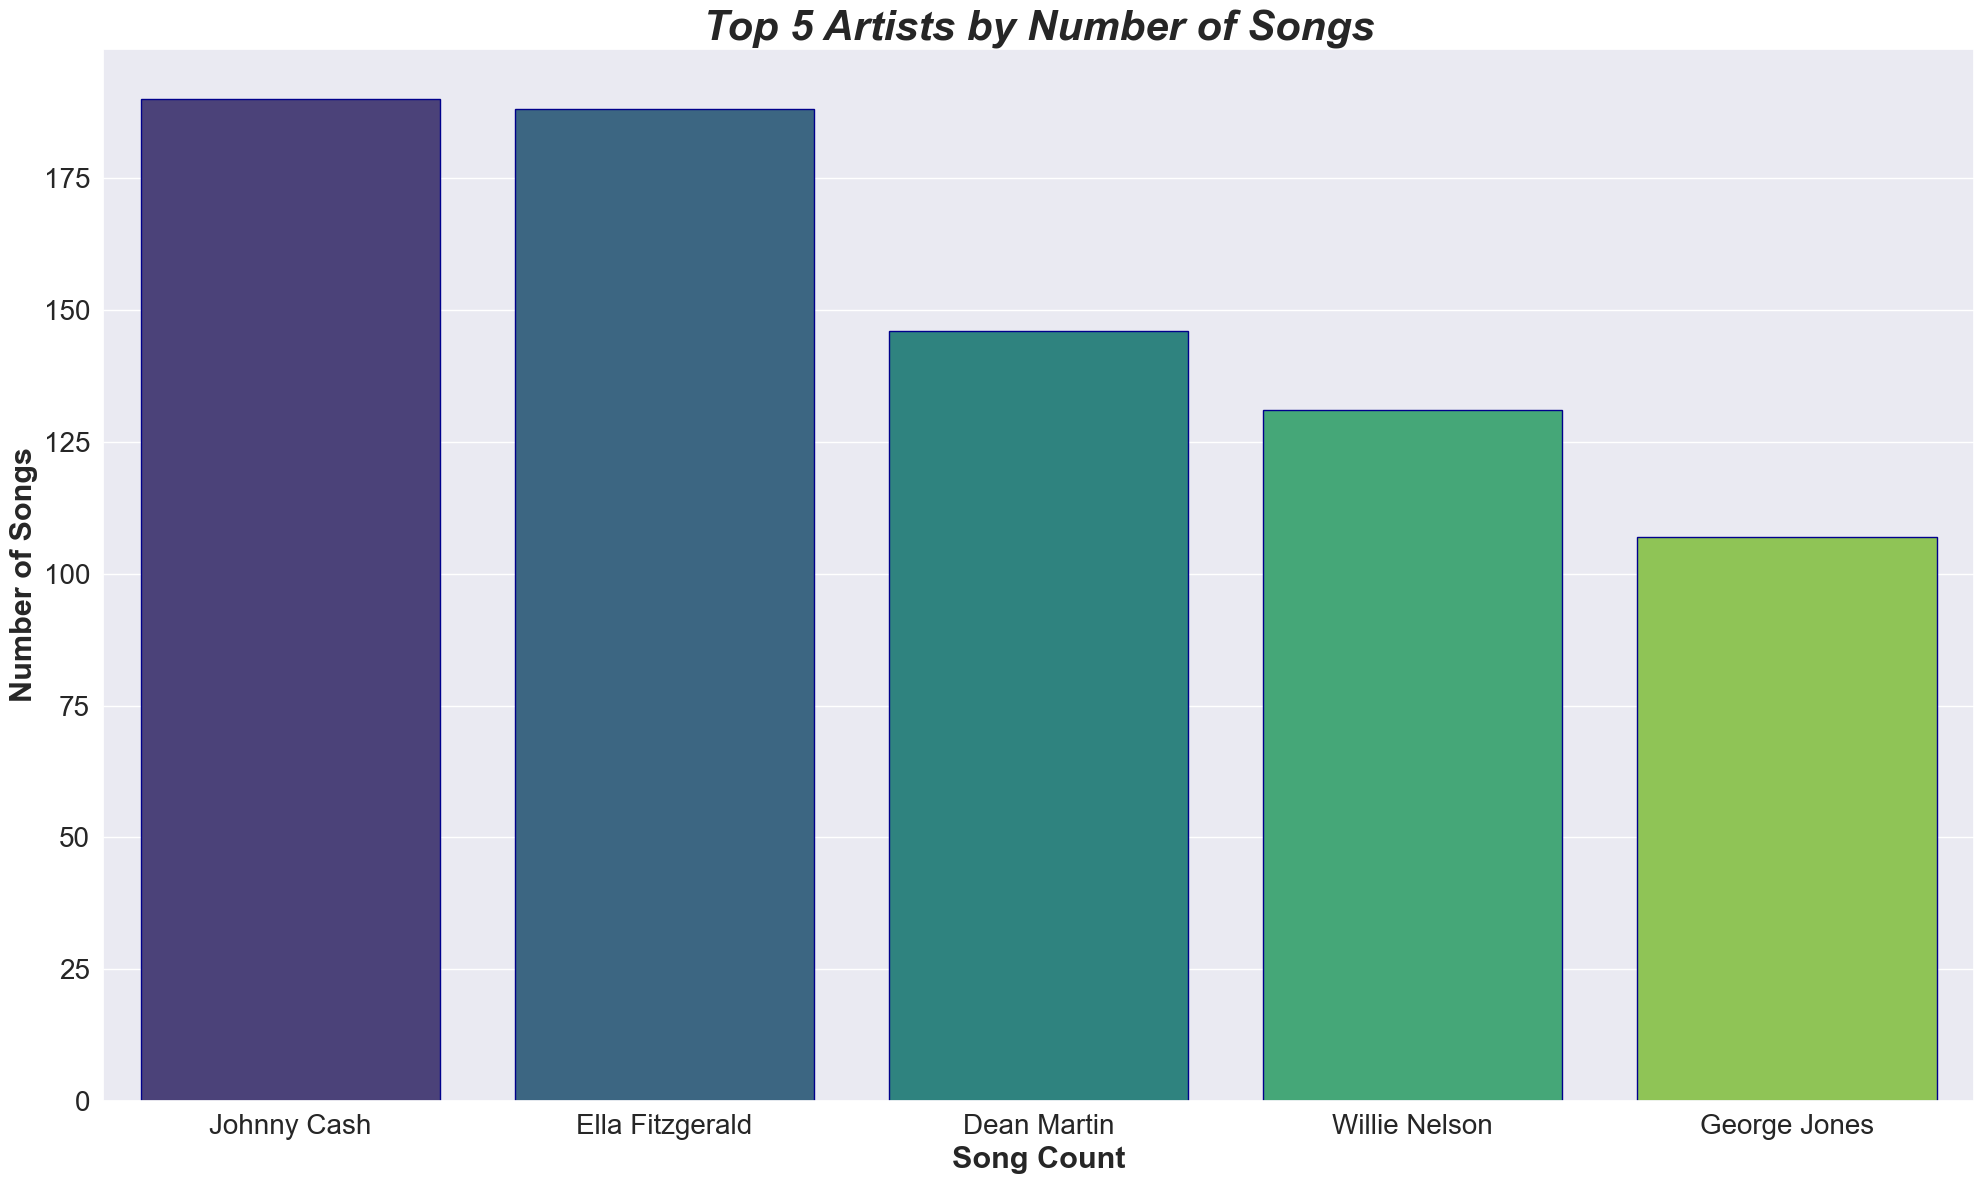

In [11]:
#Bar plot of top 10 artists
top10_artists = df['artist_name'].value_counts().head(10)

plt.figure(figsize=(20, 12))

sns.barplot(x=top10_artists.index, y=top10_artists.values, palette="magma",
            edgecolor ='limegreen')
sns.set_theme(style="darkgrid")
plt.title("Top 10 Artists by Song Count", fontsize=30, weight='bold', style='italic')
plt.xlabel('Artist Name', fontsize=23.5, weight='bold')
plt.ylabel('Number of Songs', fontsize=23.5, weight='bold')

#customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

plt.show()


#barplot of top 5 artists with the highest distribution of songs

top5_artists = {"artist": ['Johnny Cash', 'Ella Fitzgerald', 'Dean Martin', 'Willie Nelson', 'George Jones'],
        'song_count': [190, 188, 146, 131, 107]
        }
top5_artists  = pd.DataFrame(top5_artists)

plt.figure(figsize=(20, 12))

# plot 
sns.barplot(data= top5_artists, x=top5_artists["artist"], y=top5_artists["song_count"], 
            hue=top5_artists["artist"], palette="viridis",
            edgecolor ='darkblue')

sns.set_theme(style="darkgrid")

#labels
plt.xlabel("Song Count", fontsize=22, weight='bold')
plt.ylabel('Number of Songs', fontsize=22, weight='bold')
plt.title("Top 5 Artists by Number of Songs", fontsize=30, weight='bold', style='italic')


#customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=20)

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

plt.show()

In [37]:
#Store all_artists in a csv file
all_artists = df["artist_name"].value_counts()
all_artists.to_csv("data/all_artists.csv")

/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_81608/762806382.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Single Song Artists", "Multi Song Artists"], hue=None, y=[one_song_artists, more_than1song],


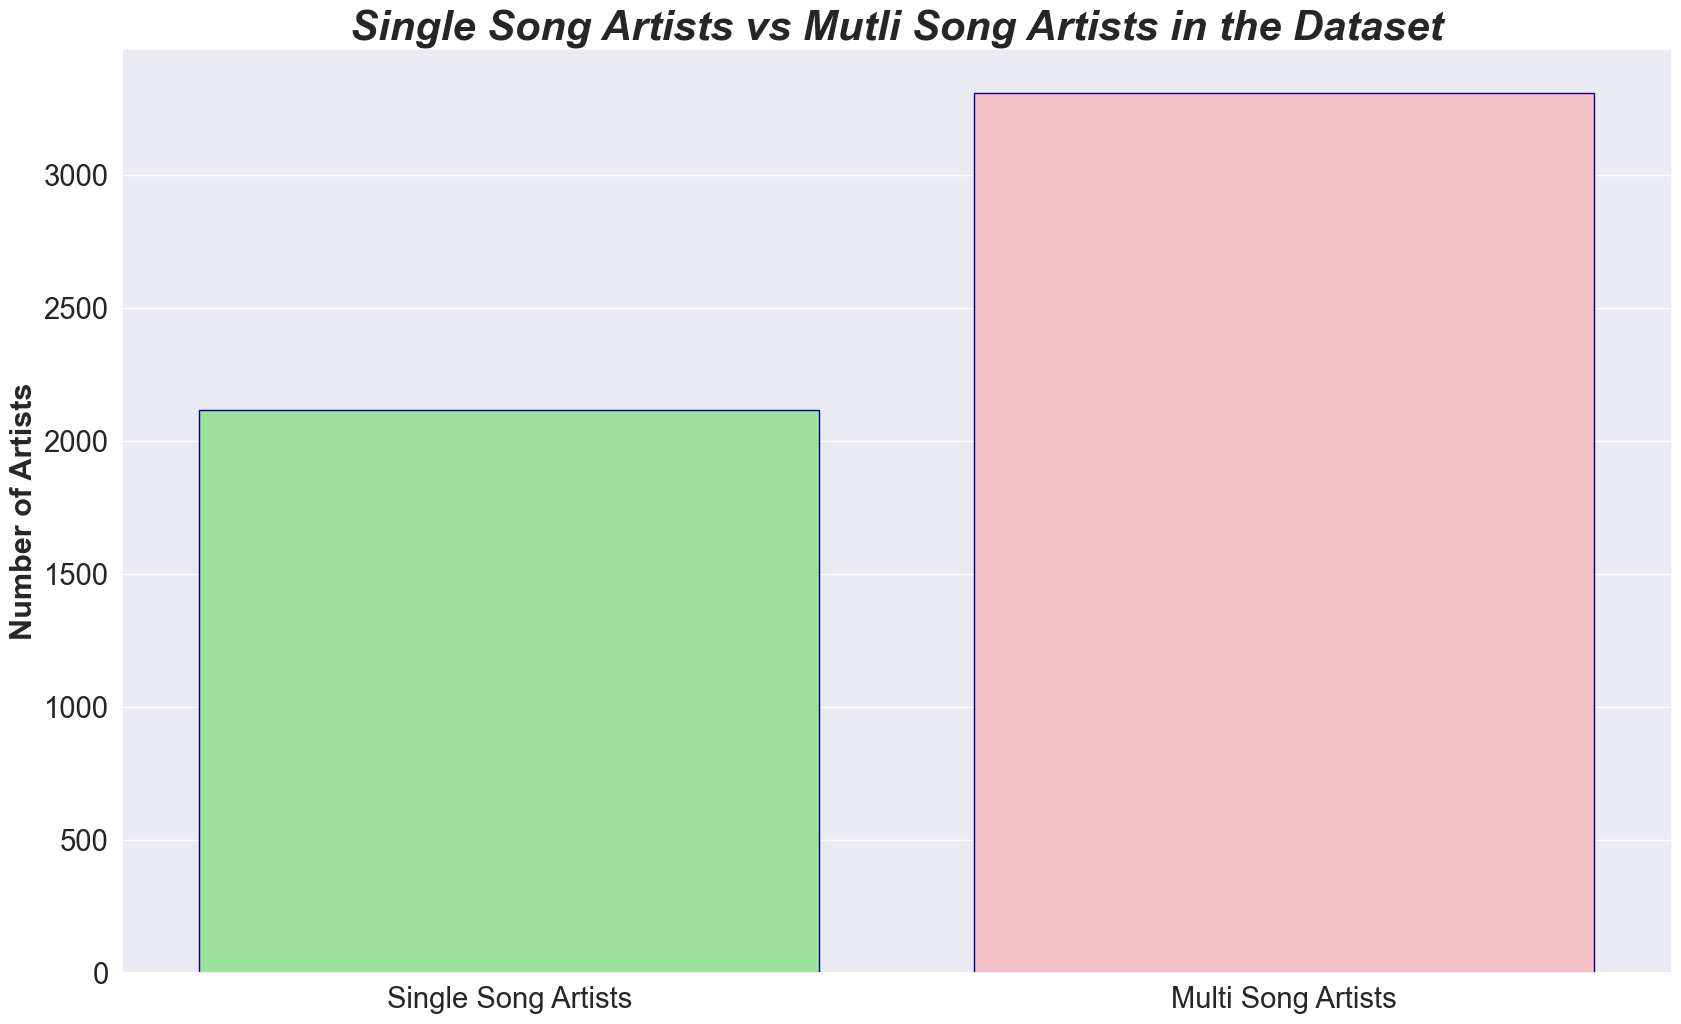

There are 3308 artists with more than one song.
There are 2116 artists with just 1 song in the dataset.



In [50]:
#Get count off all artists with only 1 song in the dataset
one_song_artists = df["artist_name"].value_counts()
one_song_artists = one_song_artists[one_song_artists == 1].sum()

#Use the nunique method instead of value counts for just sum of unique values without labels
all_artists = df["artist_name"].nunique() 

#Get count of all artists with more than one song
more_than1song = (all_artists - one_song_artists)


#plot
clrs = ["lightgreen", "lightpink"]

plt.figure(figsize=(20, 12))

sns.barplot(x=["Single Song Artists", "Multi Song Artists"], hue=None, y=[one_song_artists, more_than1song], 
            palette=clrs, edgecolor ='darkblue')

sns.set_theme(style="darkgrid")
plt.title('Single Song Artists vs Mutli Song Artists in the Dataset', fontsize=30, weight='bold', style='italic')
plt.ylabel('Number of Artists', fontsize=22, weight='bold')

#customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=21)

plt.show()

#print insights
print("There are", more_than1song, "artists with more than one song.")
print("There are", one_song_artists, "artists with just 1 song in the dataset.\n")

___
> ### *Insights* from the Univariate Analysis of the "artist_name" Feature
> * There are 5424 unique artists in total.
>
> * There are 2116 artists with only 1 song in the dataset.
>   * The majority of artists (3308 artists) in the dataset have more than 1 song.
>
> * The top 5 most popular artists in the dataset are: 
>   * Johnny Cash with 190 songs
>   * Ella Fitzgerald with 188 songs
>   * Dean Martin with 146 songs
>   * Willie Nelson with 131 songs
>   * George Jones with 107 songs

___
> ### Pre-Exisiting Info About the *"topic"* Feature
>
>  The topic of the song expressed as a string.
___

In [295]:
#Get count of the unique topics present in the dataset
df["topic"].value_counts()

topic
sadness       6094
violence      5707
world/life    5419
obscene       4881
music         2303
night/time    1823
romantic      1523
feelings       612
Name: count, dtype: int64

**There are 8 unique song topics in the dataset.**

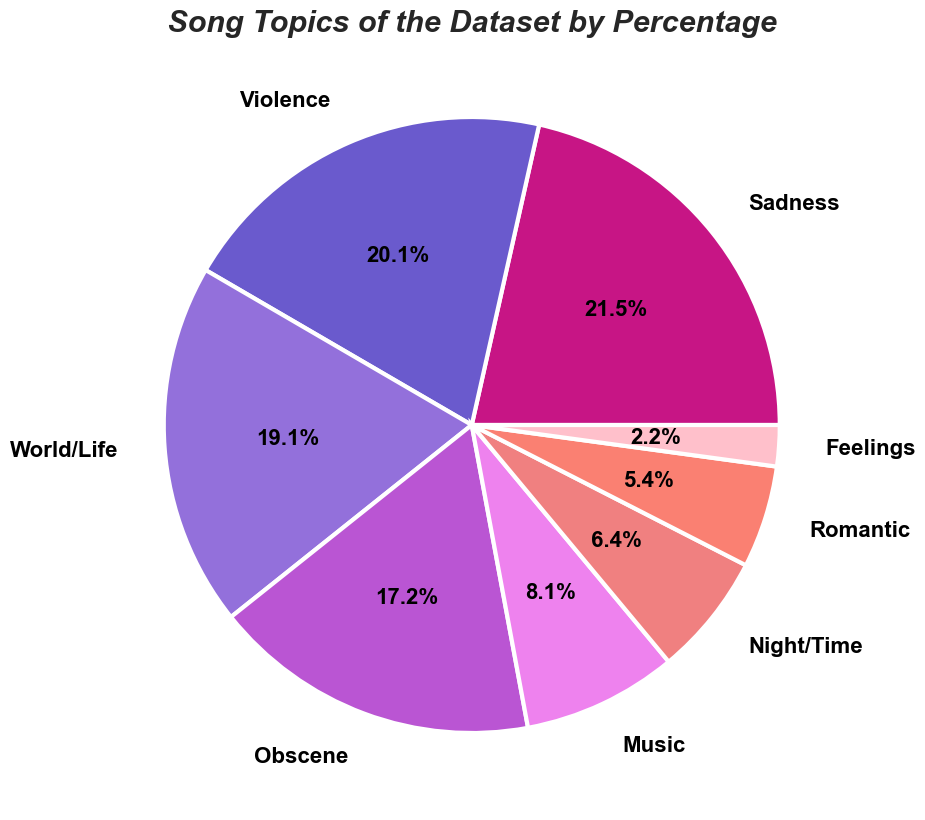

/var/folders/6k/9kv93tt9525g263ch7552sy80000gn/T/ipykernel_76774/4182622861.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  topbar= sns.barplot(data=topic_df, y="topic", x= "count", orient="h",


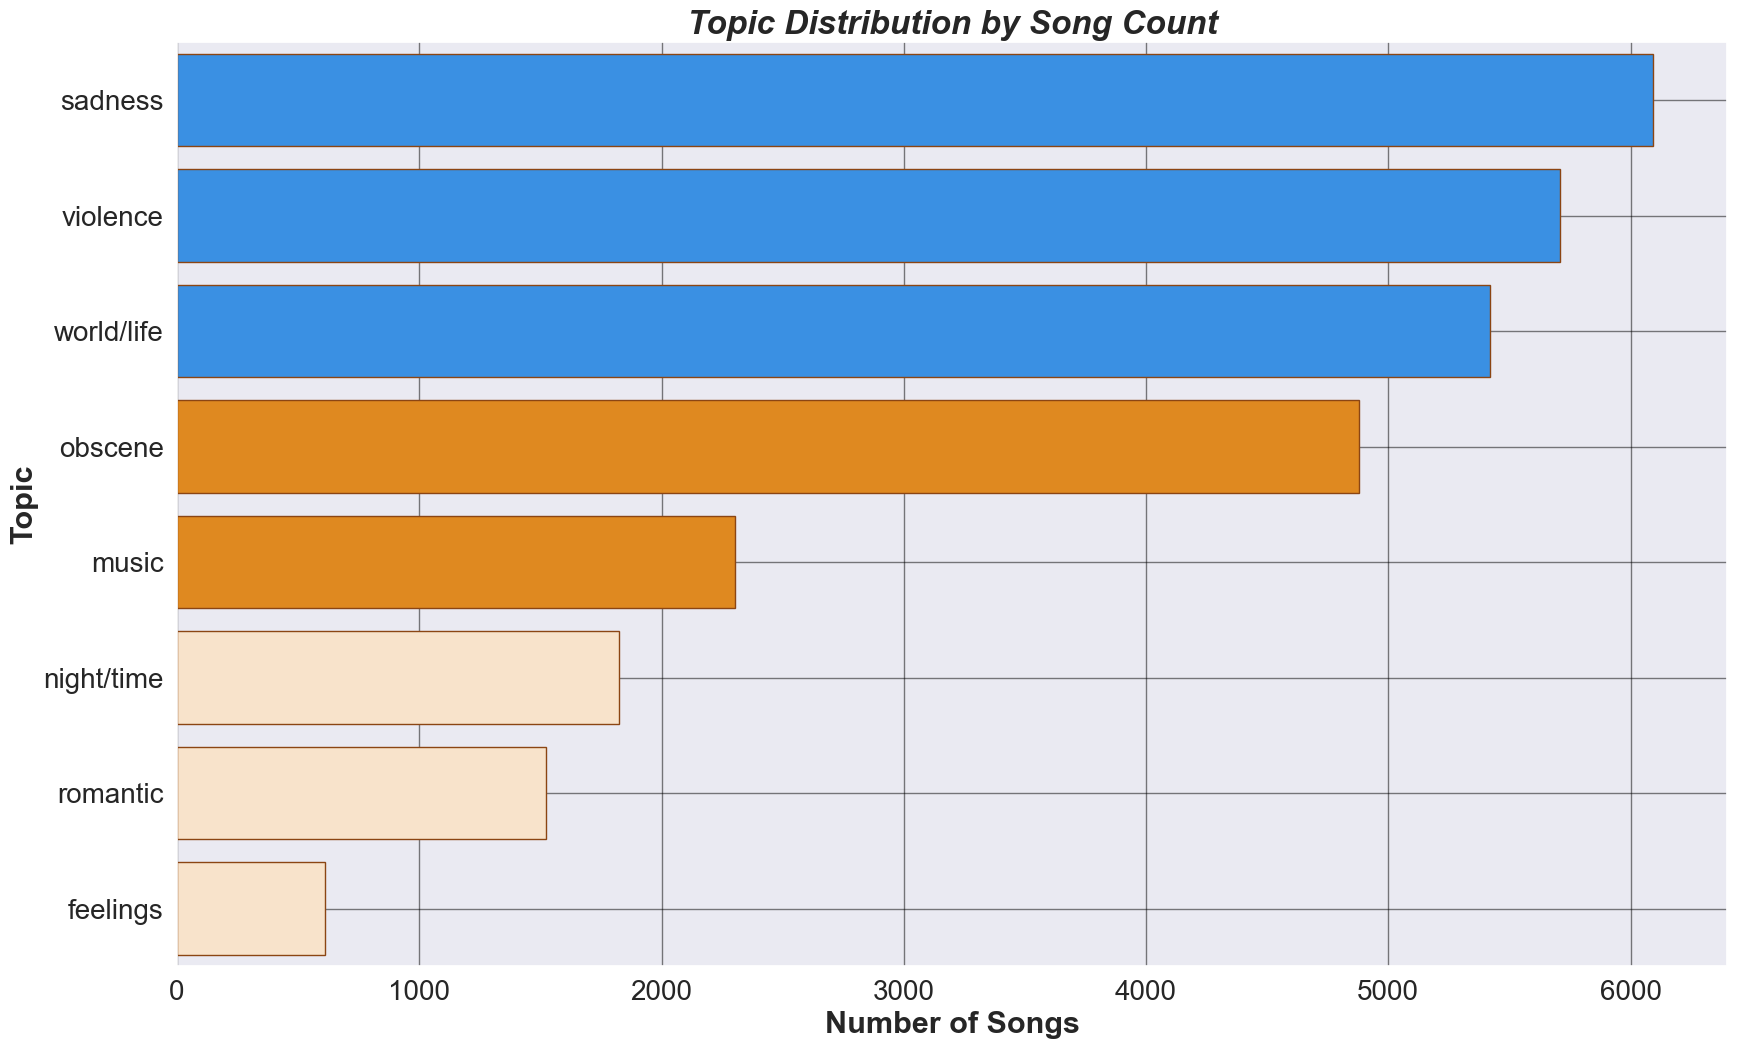

In [37]:
# Create a pieplot to visualize topics by proportion

topic_df = df["topic"].value_counts().to_frame()

x_topics = ["Sadness", "Violence", "World/Life", "Obscene", "Music", "Night/Time",
            "Romantic", "Feelings"]
y_topcounts = [6094, 5707, 5419, 4881, 2303, 1823, 1523, 612]

pie_colors = ["mediumvioletred", "slateblue", "mediumpurple", "mediumorchid", 
              "violet", "lightcoral", "salmon", "pink"]


plt.figure(figsize=(10, 10))
plt.pie(y_topcounts, labels=x_topics, labeldistance=1.15, colors=pie_colors, autopct='%1.1f%%', 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, 
        textprops={'fontsize': 16, 'weight' : 'bold', 'color': 'black'})
plt.title("Song Topics of the Dataset by Percentage", fontsize=22, weight='bold', style='italic')
plt.show()

# Create a barplot to visualize amount of topics in dataset 

order_topics = df["genre"].value_counts(ascending=False).index

#Create custom color palette
cols = ['dodgerblue', 'dodgerblue', 'dodgerblue', 'darkorange', 
        'darkorange', 'bisque', 'bisque', 'bisque' ]


#plot figure
plt.figure(figsize=(20, 12))
topbar= sns.barplot(data=topic_df, y="topic", x= "count", orient="h", 
                    edgecolor= "saddlebrown", palette=cols)

#Add grid lines to both axes
ax = topbar.axes
ax.grid(True, axis="both", color="black", alpha=0.5)

#Labels
sns.set(style="darkgrid")
plt.ylabel("Topic", fontsize=22, weight='bold')
plt.xlabel('Number of Songs', fontsize=22, weight='bold')
plt.title("Topic Distribution by Song Count", fontsize=24, 
          weight='bold', style='italic')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()



* **Sadness, Violence and World/Life account for 60.70% of all song topics in the dataset.**
* **The 3 least common song topics are Night/Time, Romantic, and Feelings.** 
* **Feelings are the topic of 2.2% of songs.**

___
> ### *Insights* from the Univariate Analysis of the "topic" Feature
>
> * Sadness, Violence and World/Life account for 60.70% of all song topics in the dataset.
>   * Sadness = 6094 songs
>   * Violence = 5707 songs
>   * World/Life = 5419 songs
> * The 3 least common song topics are Night/Time, Romantic, and Feelings.
> * Feelings are the topic of 2.2% of songs. (612 songs)

___
> ### Pre-Exisiting Info About the *"len"* Feature
>
>  The number of words in a song expressed as an integer or float.
>
___

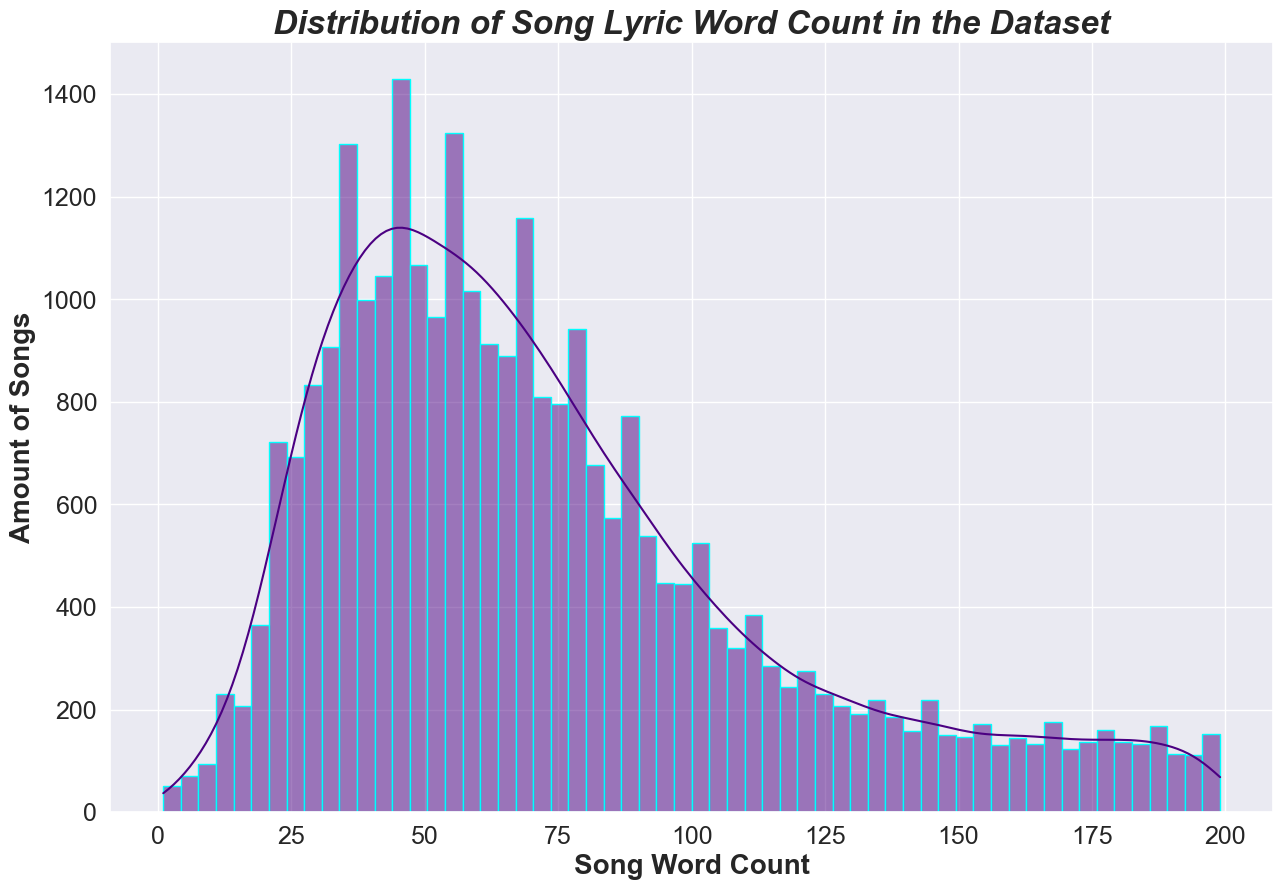

In [60]:
#Get distribution of song lengths
plt.figure(figsize=(15, 10))

sns.histplot(data = df, x = "len", color="indigo", edgecolor ='cyan', linewidth= 1, kde=True).set(title='width = 1')
sns.set(style="darkgrid")
plt.title("Distribution of Song Lyric Word Count in the Dataset", fontsize=24, weight='bold', style='italic')
plt.xlabel("Song Word Count", fontsize=20, weight='bold')
plt.ylabel("Amount of Songs", fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

In [51]:
#Find the amount of words in a song, then round to whole number 
mean_len = df["len"].mean()
mean_len = round(mean_len)

#Unrounded mean = 73.03053381284818

print ("The average word count per song is", mean_len, "words.")

The average word count per song is 73 words.


___
> ### *Insights* from the Univariate Analysis of the "len" Feature
> * The average word count per song is 73 words.
>


___

## Bivariate & Multivariate Analyses
___

#### **Let's examine  the correlation among numeric features in the dataset.**

*Numeric Features:*

* age: A score from 0 to 1 expressing how “old” a song is from our perspective. 1 being the oldest, and 0 being the newest.

* communication: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with communication (either in romantic terms or otherwise).

* dating: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with dating.

* family/gospel: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with family-oriented content or the gospel.

* family/spiritual: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

* feelings: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with emotions, either positive or negative.

* len: The number of words in the lyrics of this song

* light/visual perceptions: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the sun or other physical weather-related patterns.

* movement/places: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with movement or various locations.

* music: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with music (music about music, basically).

* night/time: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do night-life or time.

* obscene: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc).

* release_date: When this song was released

* romantic: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with romantic feeling.

* sadness: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the importance of family or spirituality.

* shake the audience: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with provocative feeling.

* violence: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with violence.

* world/life: A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with the world or life in general terms.



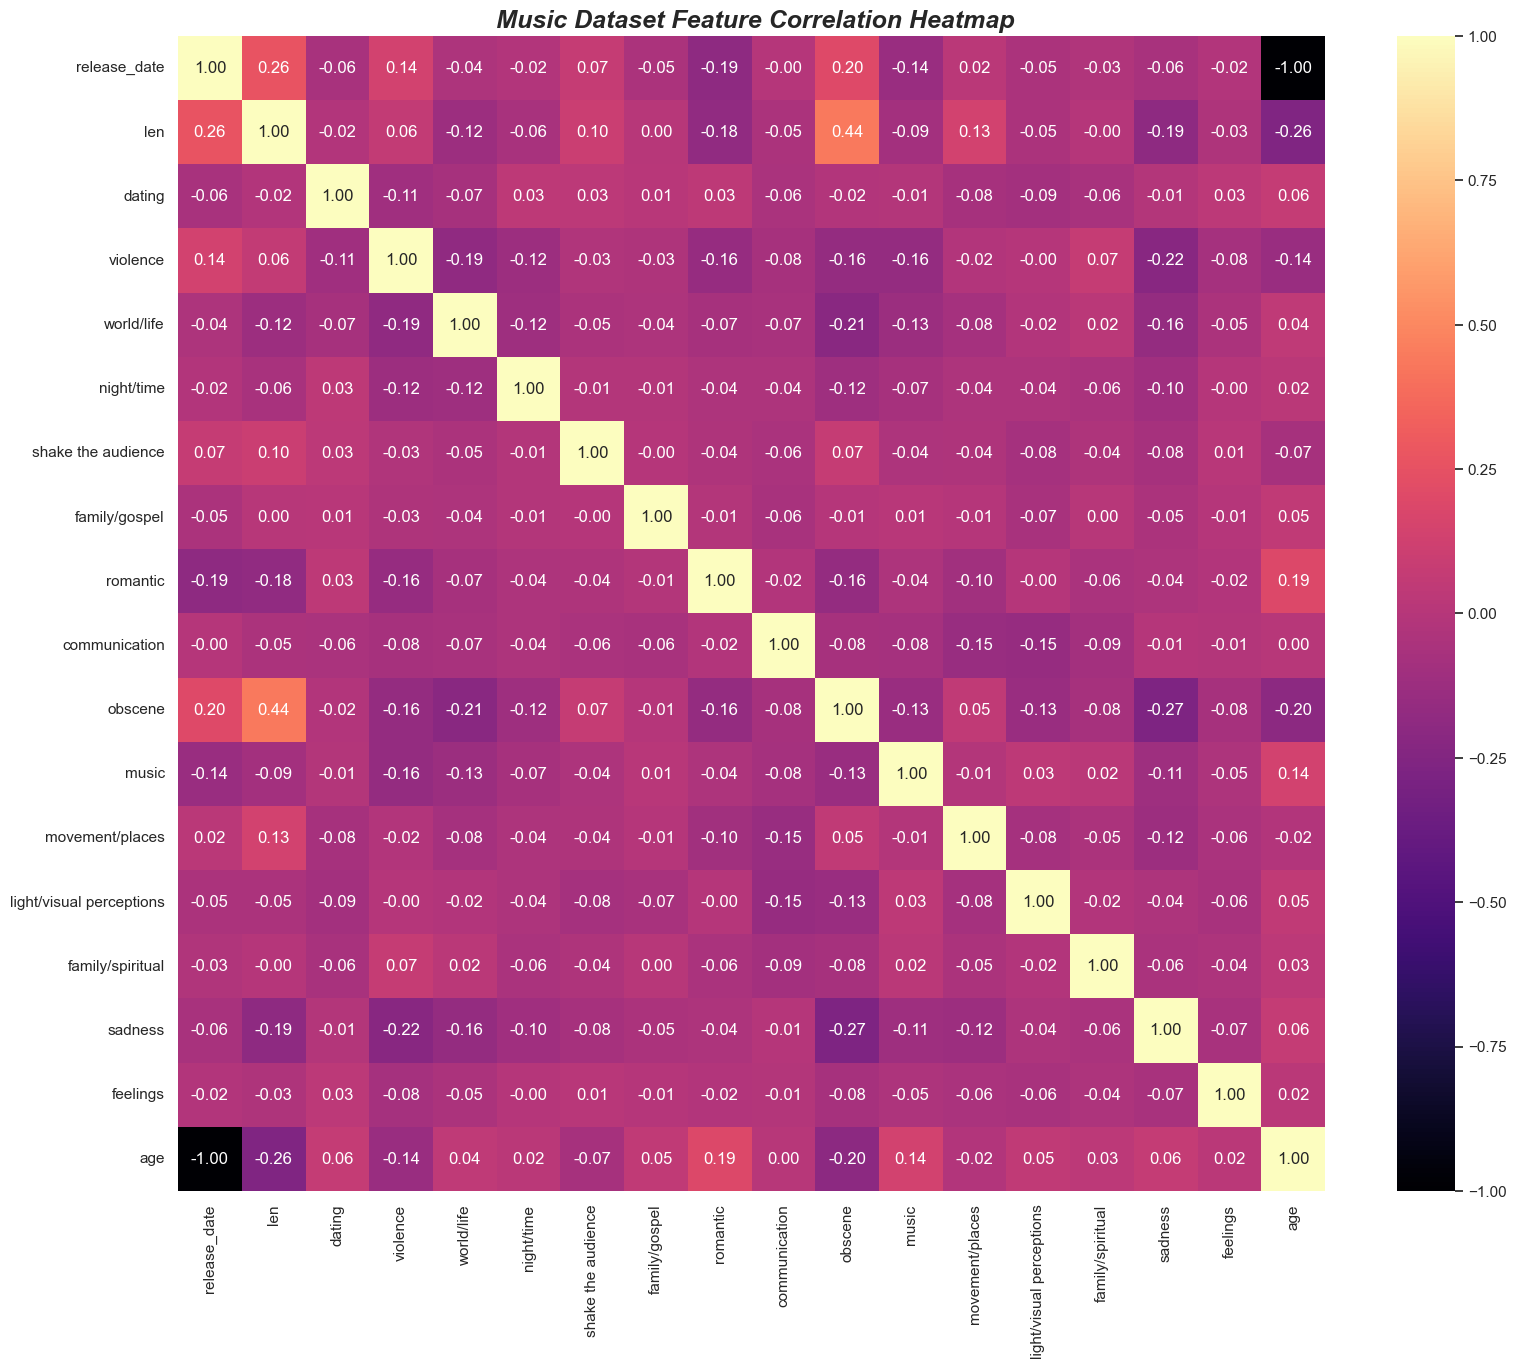

In [95]:
# Create Correlation Heatmap of Dataset Numeric Features
numeric_features = df.drop(df.filter(regex="Unnamed").columns, axis=1, inplace=True)
numeric_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(18.5, 15))
sns.heatmap(numeric_features.corr(), annot=True, cmap='magma', fmt='.2f')
plt.title(" Music Dataset Feature Correlation Heatmap", fontsize=18, weight='bold', style='italic')
plt.show()

___
> ### *Insights* from the Music Dataset Numeric Feature Correlation Heatmap
> **Points of Interest**
>   * There is a moderate correlation of .44 between *len* (a song's word count) and *obscene* (A score from 0 to 1 expressing how likely it is that this song’s lyrics have something to do with obscene content (money, rockstar-lifestyle, etc)). This may indicate that songs with obscene content trend closer towards the mean song length of 73 words than others.
>
>   * As expected, age and release_date have a perfect negative correlation of negative (-1). As the integer amount for age *increases* towards 1 (1= oldest song in the dataset), the integer amount for release_date *decreases* and vice versa. So the oldest songs (aged=1) in the dataset were released in 1950.
>
> * Most of the the other features display less than moderate positive or negative correlations to each other. **It is important to note that correlation is *linear* so though there is a lack of strong evidence for linear correlation, that does not mean these features do not have *non-linear* relationships.**
>   